In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import nbinom
from scipy.stats import randint
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


# Probability Distribution

## The General Definition

We know that a Probability Distribution is a function that will return the probability of an outcome in an experiment. A good way to define a general definition for both types of probability distribution, continuous and discrete, is by using a probability function:

$$P: \mathcal{A} \rightarrow \mathbb{R}$$

Where the input space, $\mathcal{A}$ is "related" to the sample space that is in the problem. A key term to understand is the **random variable** term. What a random variable is, contrary to what it looks like, is a FUNCTION that maps outcomes in a sample space to a set of numbers. An example of this is a coins' heads or tails. Making heads or tails the sample space, we can turn this to $1$ for heads, $-1$ for tails. Which will be our random variables. A random variable is usually denoted as: $X$. We can read $P(X \epsilon E)$ as, "The probability that a certain variable, $X$, belongs to event, $E$.

We defined that probability distribution is a function that takes in outcomes as an input, and outputs the probability of that outcome being chosen when randomly selecting an outcome. We defined discrete and continuous proabbility distributions, and the difference between univariate and multivariate distributions as well. In this section, I will create examples and charts from real data on Kaggle.

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train_and_test2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


We can see that the "Age" column is continuous, while the "Sex" column is discrete. I'll start off by extracting those columns to work with.

In [3]:
df_Age = df.loc[:,"Age"].copy()
df_Sex = df.loc[:,"Sex"].copy()
df_Sex

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

# Discrete Probability Distribution

We will start off with the "Sex" column and make a probability mass function since this is discrete.

In [4]:
df_Sex[df_Sex == 0] = "M"
df_Sex[df_Sex == 1] = "F"
df_Sex

0       M
1       F
2       F
3       F
4       M
       ..
1304    M
1305    F
1306    M
1307    M
1308    M
Name: Sex, Length: 1309, dtype: object

In [5]:
df_Sex.value_counts()

M    843
F    466
Name: Sex, dtype: int64

We must first make a **Histogram**, which is useful in telling you how many occurences of each outcome or range of outcome there are. In this case, our histogram will tell us how many men $(0's)$ and women $(1's)$ there are. in this dataset.

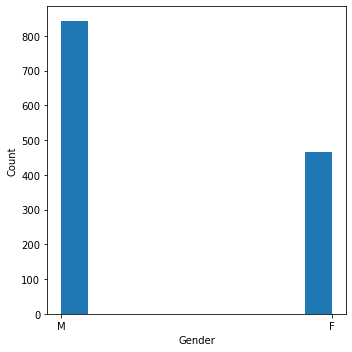

In [6]:
fig,axs = plt.subplots(1,1,figsize=(5,5))
axs.hist(df_Sex)
axs.set_xlabel("Gender")
axs.set_ylabel("Count")
plt.tight_layout()
plt.show()

In this case, our probability mass function, $p$ ,would basically only have two inputs, $M$ or $F$, which would then give us:

$$P(X = M) = 843/1309 \approx {0.644}$$

$$P(X = F) = 466/1309 \approx {0.356}$$

Which when added, gives us $1$.

## Types of Discrete Probability Distributions

### Binomial Distribution

We will first start off with a question. 
1. If we use an unfair coin $(P(1) = 0.25, P(0) = 0.75)$ 5 times, what is the probability that we will get 3 heads in a row from the first 3 tosses?
    * We know probability of getting heads is, $P(1) = 0.25$, so we multiply that 3 times to get: $0.25*0.25*0.25 = 0.015625$
    * This gives means that we took $p = 0.25$, and applied it $n = 3$ times: $p^n = 0.25^3$
2. Same scenario, but what is the probability that we will get 3 heads in a row from the first 3 tosses and no more heads?
    * We apply the same calculation, but now we know that the next 2 tosses must be failures, giving us: $p^3(q^2)$, where $p$ is the probability of success, and $q$ is probabiltity of failure.
    * $p = 0.25,q = 0.75$, so $0.25^3(0.75^2) = 0.00878906$ is the probability.
3. What is the probability that we will get 3 heads, but no more heads?
    * This is different from the other two because any of the 3 heads can be anywhere.
    * We know that the possibilities/permutations of satisfying this question is:
    
    $$pppqq$$
    $$qpppq$$
    $$qqppp$$
    $$ppqpq$$
    $$ppqqp$$
    $$pqppq$$
    $$pqpqp$$
    $$pqqpp$$
    $$qpqpp$$
    $$qqppp$$
    
    There are 10 ways. But the key thing to notice is that they all have equal chance of occuring, since multiplication is commutative. This means that the answer is just $10(p^3)(q^2) = 3(0.25^3)(0.75^2) = 0.0878906$
    * This problem was solved from using:
    
    $$\left(\begin{array}{c} 5 \\ 3 \end{array}\right) 0.25^3(1 - 0.25)^2 = \frac{5!}{3!(5 - 3)!}0.25^3(1 - 0.25)^2 = 10(0.25)^3(1 - 0.25)^2 = 0.0878906$$
    
        Since using $\left(\begin{array}{c} 5 \\ 3 \end{array}\right)$ means that we took a combination of 3 from 5.
4. Finally, if we instead toss the same unfair coin $n$ times, what is the probability that we will get $k$ heads in a row?
    * We now come to the true definition:
    
    $$f(k;n,p) = P(X = k) = \left(\begin{array}{c} n \\ k \end{array}\right) p^k(1 - p)^{n-k} = \frac{n!}{k!(n - k)!}p^k(1 - p)^{n-k}$$
    
The Binomial Distribution, labeled $B(n,p)$, is a discrete probability distribution of the number of successes with probability, $p$, in a row in $n$ independent trials. **Note that all other trials must be failures.** The equation that we derived above, labeled $f(k;n,p)$, is it's Probability Mass Function. For example, let's say that we conduct an experiment $n = 20$ times, and the probability of a successful trial is $p = 0.7$. If we let $k$, the number of successes in a sequence, be the independent variable, we will end up with the graph:

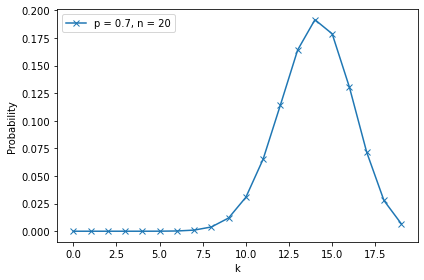

In [7]:
n = 20
p = 0.7
values = []
for k in range(n):
    values.append(binom.pmf(k,n,p))
plt.plot(range(n),values,label="p = 0.7, n = 20", marker='x')
plt.xlabel("k")
plt.ylabel("Probability")
plt.tight_layout()
plt.legend()
plt.show()

It's cumulative distribution function will look like: 

$$P(X \leq k) = \sum_i^{k}{\left(\begin{array}{c} n \\ i \end{array}\right) p^i(1 - p)^{n-i}}$$

Because you can easily add up the previous $k$ since this is discrete.

### Bernoulli Distribution

Let's use the binomial distribution scenario, but this time we only want to conduct an experiment with only 2 outcomes, once. So let's take the same example above, with an unfair coin being tossed, with $P(heads) = 0.25$, which means $P(tails) = 0.75$. Since we are only conducting this experiment once, we know that $n = 1$, so our pmf will look like:

$$\left(\begin{array}{c} 1 \\ k \end{array}\right) p^k(1 - p)^{1-k} = \frac{1}{k!(1-k!)}p^k(1 - p)^{1-k}$$

$$k \: \epsilon \: \{0,1\}$$

$$\frac{1}{k!(1-k!)}p^k(1 - p)^{1-k} = p^k(1 - p)^{1-k}$$

The last equation is the pmf of the Bernoulli Distribution. The Bernoulli Distribution is just a single event, and will output the probability of only a single outcome happening.

From this, we can say that a **Bernoulli Trial** is the trial where there are only two outcomes can occur. A success, or a failure. So by this definition, a binomial distribution is a series of Bernoulli Trials.

### Poison Distribution

Again, the binomial distribution is where this distribution came from. Let's give another problem. For some reason, every second you get $\$1$ on average, but you have a chance to get more or less than $\$1$. What is the chance you will get $\$2$? (Only whole dollars) Assuming that you get an equal chance to get a dollar, and the events are independent.

* Where would you start?
    1. If you use the binomial distribution, you know that it's parameters for the pmf are $n$ and $p$. In this case, we don't know what these values are, but we know that no matter what, if we allow the tests to be ran $n$ times with $p$ probability, $np = \lambda$, on average we would get $\$1$. This means that $1 = \lambda = np$.
    2. We get $p = \frac{\lambda}{n}$. We can substitute this into the pmf of the binomial distribution to get:
    
    $$\left(\begin{array}{c} n \\ k \end{array}\right) (\frac{\lambda}{n})^k(1 - \frac{\lambda}{n})^{n-k} = \frac{n!}{k!(n - k)!}(\frac{\lambda}{n})^k(1 - \frac{\lambda}{n})^{n-k}$$
    
    3. The next variable in question is $n$. What does $n$ here mean for us? We know in the binomial distribution, it means how many trials we will end up doing, but in our problem, we don't know what that number is. In these type of questions, we have to consider the possibility that at *ANY* time we may get a success. This means that our number of trials within a second is theoretically, $n = \infty$. But we obviously cannot plug this number in, so we must use a limit.
    
    $$\lim_{n \rightarrow \infty}\frac{n!}{k!(n - k)!}(\frac{\lambda}{n})^k(1 - \frac{\lambda}{n})^{n-k}$$
    
    We will simplify algebraically:
    
    $$= \frac{\lambda^k}{k!}\lim_{n \rightarrow \infty}\frac{n!}{(n - k)!}\frac{1}{n^k}(1 - \frac{\lambda}{n})^{n-k}$$
    
    $$= \frac{\lambda^k}{k!}\lim_{n \rightarrow \infty}\frac{n!}{(n - k)!}\frac{1}{n^k}(1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k}$$
    
    Let's find limits piece by piece. We will look at and solve this limit:
    
    $$\lim_{n \rightarrow \infty}\frac{n!}{(n - k)!}\frac{1}{n^k}$$
    
    $$= \lim_{n \rightarrow \infty}\frac{n(n - 1)(n - 2)...(n - k)(n - k - 1)...(1)}{(n - k)!}\frac{1}{n^k}$$
    
    $$= \lim_{n \rightarrow \infty}\frac{n(n - 1)(n - 2)...(n - k)(n - k - 1)...(1)}{(n - k)(n - k - 1) ... (1)}\frac{1}{n^k}$$
    
    $$= \lim_{n \rightarrow \infty}\frac{n(n - 1)(n - 2)...(n - k + 1)}{n^k}$$
    
    $$= \lim_{n \rightarrow \infty}(\frac{n}{n})(\frac{n - 1}{n})(\frac{n - 2}{n})...(\frac{n - k + 1}{n})$$
    
    Notice that each of the factors approach $1$ as $n$ approaches infinity, which means that: 
    
    $$\lim_{n \rightarrow \infty}\frac{n!}{k!(n - k)!}(\frac{\lambda}{n})^k = \frac{\lambda^k}{k!}\lim_{n \rightarrow \infty}\frac{n!}{(n - k)!}(\frac{1}{n^k}) = \frac{\lambda^k}{k!}$$
    
    Now we have:
    
    $$\frac{\lambda^k}{k!}\lim_{n \rightarrow \infty}(1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k}$$
    
    Let's then solve:
    
    $$\lim_{n \rightarrow \infty}(1 - \frac{\lambda}{n})^{n}$$
    
    Which looks like:
    
    $$\lim_{n \rightarrow \infty}(1 + \frac{1}{x})^{x} = e$$
    
    We will manipulate our equation to make it look like $e$. Let's make the substitution using $x = -\frac{n}{\lambda}$:
    
    $$\lim_{n \rightarrow \infty}(1 + \frac{1}{x})^{x(-\lambda)} = (\lim_{n \rightarrow \infty}(1 + \frac{1}{x})^{x})^{-\lambda} = e^{-\lambda}$$
    
    Now we have:
    
    $$\frac{\lambda^ke^{-\lambda}}{k!}\lim_{n \rightarrow \infty}(1 - \frac{\lambda}{n})^{-k}$$
    
    Let's finally solve:
    
    $$\lim_{n \rightarrow \infty}(1 - \frac{\lambda}{n})^{-k}$$
    
    Because of the $n$ being in the denominator:
    
    $$\lim_{n \rightarrow \infty}(1 - \frac{\lambda}{n})^{-k} = 1$$
    
    Now our final equation for **Poisson Distribution**'s probability mass function is:
    
    $$f(k,\lambda) = \frac{\lambda^ke^{-\lambda}}{k!}$$
    
    4. Plug in $\lambda = 1$, and $k = 2$:
    
    $$\frac{1^2e^{-1}}{2!} = \frac{1}{2e}$$
    
 The **Poisson Distribution** is used for finding the probability of a certain number of events successfully occuring, $k$ , in a certain time interval with average occurency of $\lambda$.

Let's now plot the probability mass function when $\lambda = 1$:

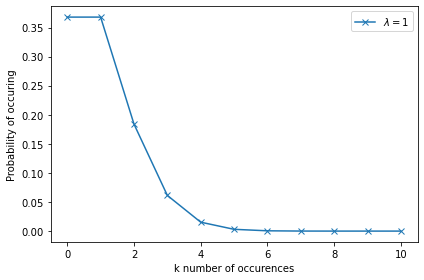

In [8]:
#Poisson Distribution's pmf with lambda = 1
k = np.array([0,1,2,3,4,5,6,7,8,9,10])
lam = 1
P = poisson.pmf(k,lam)
plt.plot(k,P,marker="x",label=r"$\lambda = 1$")
plt.xlabel("k number of occurences")
plt.ylabel("Probability of occuring")
plt.tight_layout()
plt.legend()
plt.show()

From here, we can see that the probability of getting $\$2$ is slightly higher than $0.15$.

### Geometric Distribution

Again, we will start this off by asking a question similar to the ones before. With an unfair coin with $P(head) = 0.25$, what is the probability that the coin will land on tails $3$ times before we get a head? What about the probability that the coin will land on tails $n$ times before it lands on a head? This is the problem that Geometric Distribution answers. The **Geometric Distribution** outputs the probability that you will get $k$ number of failures before you hit a success if the probability of success is $p$. How would you answer this question?

* This is easy if you understood the Binomial Distribution. Now since we are dealing with the probability of failures first, then finally a success, we would want to count the failures first. This would look like:

    $$(1 - p)^k$$

    But we also want to tack on the probability of success since we want to find precise number of failures BEFORE the first success. This looks like:
    
    $$P(Y = k) = (1 - p)^kp$$
    
    This is the probability mass function for the Geometric Distribution. $Y$ is the number of failures

* There is another way to ask nearly the same question, which will then give you a different pmf. What is the probability that we will need $4$ trials until we get the first success by landing on heads?:

    $$P(X= k)(1 - p)^{k-1}p$$
    
    Where $k$ is 4 in this instance. This is also the version of pmf that scipy's geometric distribution uses. $X$ is the number of trials.
    
Now to answer the question of, "What is the probability that we will need $4$ trials until we get the first success by landing on heads?", we will graph the pmf using the second pmf which uses number of trials.

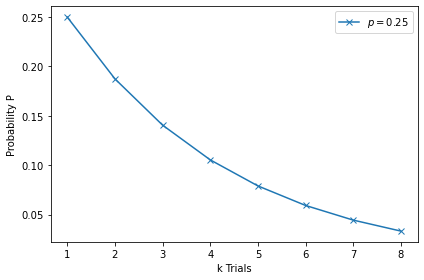

In [9]:
#Probability Mass Function for Geometric Distribution
X = np.array([1,2,3,4,5,6,7,8])
P = geom.pmf(X,0.25)
plt.plot(X,P,marker="x",label=r"$p = 0.25$")
plt.legend()
plt.xlabel("k Trials")
plt.ylabel("Probability P")
plt.tight_layout()
plt.show()

So there is a little more than $10\%$ chance of needing $4$ trials to land on heads for the first time.

### Negative Binomial Distribution

Using the same scenario with the unfair coin, let's ask the question: What is the probability we will get $3$ tails before we get $4$ heads $p = 0.25$? You notice that this is like an extension of the geometric series, except instead of asking before we get a single head, we get $4$ heads.

* Let's write down the scenarios where this could happen, where $h$ is heads, and $t$ is tails (A key note here is that the last tail must by definition be a failure:

    $$p(ttthhhh) = 0.25^4*0.75^3 = 0.00164794921$$
    $$p(tththhh) = 0.75*0.25^4*0.75^2 = 0.25^4*0.75^3 = 0.00164794921$$
    $$p(thtthhh) = 0.00164794921$$
    $$.........$$

We can see that no matter what permutation we choose, the probability will always be $0.00164794921$.

* Since we know that we are dealing with a permutation of 3 tails and 4 heads, we can just simply use the binomial coefficient. But unlike the regular binomial coefficient in the binomial distribution where in this case it would be $\left(\begin{array}{c} 7 \\ 4 \end{array}\right)$ if it was, this binomial coefficient has a restriction placed on it. The last element has to be a success. So even if there are 4 successes, we can only move 3 of them while the last spot cannot be chosen, meaning there are only 6 spots now. So the binomial coefficient for this is $\left(\begin{array}{c} 6 \\ 3 \end{array}\right)$. Let's finally answer the problem:

    $$f(k;r,p) = (\left(\begin{array}{c} 6 \\ 3 \end{array}\right)0.25^4*0.75^3 = \frac{6!}{( 3!)^2}(0.00164794921) = 0.03295842$$

    So the probability we will get $3$ tails before we get $4$ heads is $0.03295842$.

By definition, the **Negative Binomial Distribution** models the number of failures, $k$, before a certain number of successes, $r$, occur. Since in our example, we notice that the last spot of the $k + r$ spots was taken by the last success. Therefore, the Probability Mass Function with parameters $p$ and $r$ is:

$$\left(\begin{array}{c} k + r - 1 \\ r - 1 \end{array}\right)(1 - p)^kp^r$$

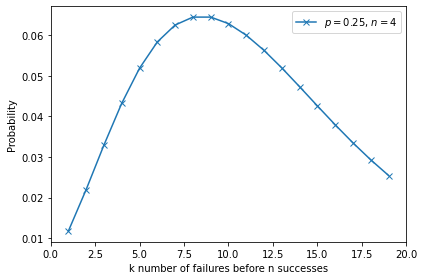

In [10]:
#Graphing our unfair coin scenario with p = 0.25 and n/r = 4 (number of successes)
k = np.arange(1,20)
y = nbinom.pmf(k, 4, 0.25)
plt.plot(k,y,marker = 'x',label=r"$p = 0.25$, $n = 4$")
plt.legend()
plt.xlim(0,20)
plt.xlabel("k number of failures before n successes")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

### Uniform Discrete Distribution

In scipy, the Uniform Discrete Distribution is the .stats.randint function.

Let's start with a question. What is the probability you will land on a $1$ on a $6$-sided die? What about a $4$? A $6$? Every outcome has the same chance of happening as the others. This means that there is uniform distribution among the discrete outcomes. By definition, the discrete uniform distribution is where a finite amount of numbers are equally likely to be observed. The probability mass function is just simply:

$$f(k) = \frac{1}{n}$$

Where $n$ is the number of numbers. In scipy, you can give the bounds of the possible integers. Let's show by example.

In [11]:
low = 5 #Lower bound (inclusive)
high = 10 #Upper bound (exclusive)
randint.rvs(low,high) #rvs will return a random number

5

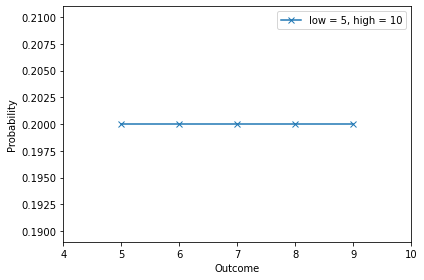

In [12]:
k = np.arange(low,high)
y = randint.pmf(k,low,high)
plt.plot(k,y,marker = 'x',label=r"low = 5, high = 10")
plt.legend()
plt.xlim(4,10)
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

As you can see, the pmf will always be $\frac{1}{5}$.

# Summary Statistics

Now that we have a good idea of what some probability distributions look like, we should find ways to describe them and the meanings of these descriptive terms before we move into continuous probability distribution which rely on some of these summary statistics.

Ways to summarize observations include:

1. Measure of location where selection is most probable. Referred to as Central Tendency.
2. Measure of dispersion of data. Referred to as Statistical Dispersion.
3. Measure of shape of the distribution. Includes Skewness and Kurtosis.
4. If given observing more than one variable, you can look for Statistical Dependence like Correlation.

## Central Tendency

A **Central Tendency** is a value that is "central" to the distribution, or a typical value that will most likely get chosen in a distribution. To get a better idea of the "central tendency" we can define it using different "measures":

### Mean

The mean is the sum of all individual data points in the set, divided by the number. We can use this definition:

$$mean = \frac{1}{n}\sum_{i = 1}^n{a_i} = \frac{a_1 + a_2 ... + a_n}{n}$$

We can interpret the mean as the number whose values lesser than it is balanced by the values greater than it. Ex:

In [13]:
X = np.array([1,2,3,4,6])
X.mean()

3.2

If we calculate the difference of all numbers from the mean:

In [14]:
X - X.mean()

array([-2.2, -1.2, -0.2,  0.8,  2.8])

Then add those distances together:

In [15]:
(X - X.mean()).sum()

-8.881784197001252e-16

Which is zero we can even apply this to our data frame:

In [16]:
(df["Age"] - df["Age"].mean()).sum()

1.1368683772161603e-12

The con of using mean is that it can be skewed by a small number of of extreme values.

### Median

The "middle" of the dataset that seperates the lower half of the data to the upper half of the data. Or a better general definition, is the value, $m$, in a probability distribution where every outcome before it accounts for $0.5 - P(X = m)$, while every outcome after it  accounts for the other $0.5 - P(X = m)$ section. Ex:

In [17]:
#if size of data is odd, it takes the exact middle
X = np.array([0,1,5,10,13])
np.median(X)

5.0

In [18]:
#if size of data is even, it takes the average of the two middle 
X = np.array([0,1,10,13])
np.median(X)

5.5

#### Mean vs Median

A big pro of using median as the central tendency measure, is that it is useful when one doesn't care about extreme values in the data compared to mean. Ex:

In [19]:
X = np.array([1,1,2,4,3,5,9,6,7,8,4,6,10000000])
print("Mean = ", X.mean())
print("Median = ", np.median(X))

Mean =  769235.0769230769
Median =  5.0


You can see that mean is skewed heavily from just one outlier. Mean is statistically better when, and only when, the data is not skewed with outliers.

### Mode

The value that is most likely to be chosen. In a probability distribution, it is the value that has the highest probability. Ex:

In [20]:
df["Age"].mode()

0    28.0
dtype: float64

We can see that most people on the Titanic are $28$ years old.

There are many other ways to measure Central Tendency, but the ones shown are the most important ones. Other measures of central tendency are: [Geometric Mean | Harmonic Mean | Weighted Arithmetic Mean | Truncated Mean or Trimmed Mean | Interquartile Mean | Winsorized Mean | Quadratic Mean or Root Mean Square | Midrange | Midhinge | Trimean | Geometric Median | Tukey Median | Simplical Depth ]

## Statistical Dispersion

The measure of how stretched or squeezed a distribution is. We will go over 5 different measures for statistical dispersion:

1. Range
2. Interquartile Range
3. Deviation
4. Variance
5. Standard Deviation

### Range

The range of data is the between the highest and lowest value that the data reaches. Let's do an example using the "Age" column:

In [21]:
print("Max value: ", df["Age"].max())
print("Min values: ", df["Age"].min())
print("Range of feature \"Age\" = " , df["Age"].max() - df["Age"].min())

Max value:  80.0
Min values:  0.17
Range of feature "Age" =  79.83


### Interquartile Range

Now that we have defined the median being the value that splits a distribution $50/50$, we can also go further and find the values that split a distribution $25/75$ and $75/25$. Let's split the distribution in quartiles, with the $Q4$ quartile being the entire distribution ending at the max value. Since $Q4$ is $100\%$ of the distribution, then $Q3$ is the first $75\%$ of the distribution, $Q2$ is $50\%$ of the distribution, and $Q1$ is the lowest $25\%$ part. The interquartile range is defined as the Interquartile Range (IQR) is:

$$IQR = Q3 - Q1$$

This means that the $IQR$ contains the middle $50\%$ of the distribution, which is the data between $Q1$ and $Q3$. Let's use the "Age" feature as to look at the interquartile range.

In [22]:
#We must find the median first
from math import floor
def find_median(ser,firstid,lastid): #note lastid is included
    med_id = (lastid-firstid)/2 + firstid
    if((lastid-firstid)%2 == 0):
        median = ser[med_id]
    else:
        median = (ser[floor(med_id)] + ser[floor(med_id)+1])/2
    return (median,med_id)

In [23]:
#This is the Q2 quartile
sorted_Age = df["Age"].sort_values(ignore_index = True).copy()
lid = len(sorted_Age) - 1
q2 = find_median(sorted_Age, 0, lid)
q2

(28.0, 654.0)

In [24]:
#Let's find the Q1 quartile and Q3 quartile from knowing the Q4 quartile
q4 = (sorted_Age[len(sorted_Age)-1],len(sorted_Age)-1)
if(q2[1]%1 == 0):
    q1 = find_median(sorted_Age,0,q2[1]-1)
    q3 = find_median(sorted_Age,q2[1]+1,q4[1])
else:
    q1 = find_median(sorted_Age,0,floor(q2[1]))
    q3 = find_median(sorted_Age,floor(q2[1])+1,q4[1])

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)
print("Q4: ", q4)

Q1:  (22.0, 326.5)
Q2:  (28.0, 654.0)
Q3:  (35.0, 981.5)
Q4:  (80.0, 1308)


Now we have know the quartiles. So the interquartile range is simply $35.0 - 22.0$ which gives us $13.0 = IQR$

### Deviation

These next three topics are very important, so I will go in depth with examples and explanations. We will start off with this dataset:

In [25]:
test = pd.Series([2,5,8,10,15,20])
test

0     2
1     5
2     8
3    10
4    15
5    20
dtype: int64

Let's say I asked: What is the average distance of each datapoint from the mean?

1. The first thing to do is find the mean:

In [26]:
test.mean()

10.0

2. Now that we have our mean, $\bar{x} = 10$, we need to find the distances of each data point:

In [27]:
test - test.mean()

0    -8.0
1    -5.0
2    -2.0
3     0.0
4     5.0
5    10.0
dtype: float64

3. We have negative distances which we don't want. We just want to know how far something is, not the actual difference. So we must take the absolute value of each element:

In [28]:
(test - test.mean()).abs()

0     8.0
1     5.0
2     2.0
3     0.0
4     5.0
5    10.0
dtype: float64

4. Finally, we need to sum up these values and divide by the number of values there are:

In [29]:
(test - test.mean()).abs().sum()/len(test)

5.0

This is our Mean/Average Absolute Deviation Equation:

$$MD = E[|X - Y|] = \frac{1}{n}\sum_{i=0}^n{|x_i - Y|}$$

Where $E$ is the expected value, meaning mean, of $|X - Y|$, where $Y$ is the mean of the data. This gives you the average distance from the mean of the data.

1. **Deviation** : A measure of difference between a value that we have observed, $x_i$, and another value that we have. In this case, we used the mean as that "other" value.

    * There are two types of different Deviations. A deviation from an observed value against it's **REAL** value is an **Error**. A deviation from and observed value against an **ESTIMATE** of the value is a **Residual**. We have been dealing with residual deviations.
2. **Absolute Deviation** : The absolute difference between a value that we have observed, and another value that we have.
3. **Mean/average Absolute Deviation** : Mean/average absolute deviation is not defined as the average of the absolute deviations from the mean. It is actually the average of the absolute deviations. This means we can find the average distance from not just the mean, but also from the median, mode, and other central points, as well as a true value. So we can now generalize this with our final formula:

$$MD = E[|X - m(X)|] = \frac{1}{n}\sum_{i=0}^n|x_i - m(X)|$$

Where $m(X)$ is a central point of $X$.

There are certain "gripes" that we can improve on. 
1. We know that doing algebra on this will be hard because of the absolute value.
2. We may not want to punish deviations that are small.
3. We may want to punish deviations that are large.

So there is a simple improvement we can make on this:

### Variance

Variance is defined as the expected value of the squared deviation from the mean.:

$$Var(X) = E[(X - \mu)^2] = \frac{1}{n}\sum_{i=0}^n(x_i - \mu)^2$$

We can also derive certain equations algebraically:

$$E[(X - \mu)^2] = E[(X - E[X])^2]$$

$$= E[X^2 - 2XE[X] - E[X]^2]$$

$$= E[X^2] - 2E[X]E[X] - E[X]^2$$

$$Var(X) = E[X^2] - E[X]^2$$

So we can say that the variance is the difference between the expected value of $x^2$ and the expected value of $x$ squared. This measure of dispersion/variation fixes the issues with Mean/average absolute deviation. Since we have easier times doing algebra on exponents rather than absolute values. The exponent punishes the values that are farther, and doesn't punish the closer values as harshly.

Let's use our age example:

In [30]:
df["Age"].var()

166.54523456872326

But because of how the equation works, we don't have $166.54$ $years$ as the variance of the "Age" column. The variance of the "Age" column is $166.54$ $years^2$.

### Standard Deviation

We want to keep our measure of dispersion on the same unit as the data. Since variance will be in $unit^2$, we just need to square root the entire thing to end up with the original unit. This is where the use of standard deviation comes from.

$$SD = \sigma = \sqrt{{\frac{1}{n}\sum_{i=0}^n(x_i - \mu)^2}}$$

Important to keep in mind that $\sigma$ is for the *Population Standard Deviation*. $s$ is for the *Sample Standard Deviation* which is:

$$s = \sqrt{{\frac{1}{n-1}\sum_{i=0}^n(x_i - \mu)^2}}$$

This solves the issues of wanting greater differences to be punished more, smaller differences to be punished less, and keeping the units in the same unit as the original unit.

# Continuous Probability Distribution

Now we can deal with the "Age" Column of our DataFrame.

In [31]:
df["Age"]

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64

Let's say I asked you what is the probability that a person I randomly choose will be 28?

## Types of Continuous Probability Distributions

### Normal Distribution

Before we define what a Normal Distribution is, we should understand where it comes from. The first theorem that we must understand is the **Law of Large Numbers**.

If I ask you what is the **expected value/mean** of rolling a 6-sided dice, what would the answer be?
$$\frac{1+2+3+4+5+6}{6} = 3.5$$
So $E[X] = 3.5$.

Now let's say instead, you just roll the dice multiple times and recorded the averages of all the values you rolled on. Notice that after a sufficiently large number of rolls, the average will converge to the expected value/mean. The **Law of Large Numbers** theorem states that the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed.[1] (Wikipedia).

The next theorem that we need to understand is the **Central Limit Theorem**.

The theorem states that the sample mean will be approximately normally distributed for large sample sizes, regardless of the distribution from which we are sampling.

From the Law of Large Numbers, we can say that with large $n$, the sample mean, $\bar{X}$ is approximately equal to the population mean, $\mu$. We can also apply this to the standard deviation. So $s \rightarrow \frac{\sigma}{\sqrt{n}}$.